 1- how mobile devices are distributed among different network technologies (2G, 3G, 4G)

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [2]:
#hypothetical data
np.random.seed(42)

data = {
    'Device_ID': range(1, 101),  
    'Network_Technology': np.random.choice(['2G', '3G', '4G'], 100, p=[0.1, 0.4, 0.5]) 
}

df_devices = pd.DataFrame(data)

df_devices.head()


,Device_ID,Network_Technology
0,1,3G
1,2,4G
2,3,4G
3,4,4G
4,5,3G


In [3]:
#distribution of network technologies
distribution = df_devices['Network_Technology'].value_counts(normalize=True) * 100

print("Distribution of Devices among Network Technologies:")
print(distribution)


Distribution of Devices among Network Technologies:
Network_Technology
4G    47.0
3G    40.0
2G    13.0
Name: proportion, dtype: float64


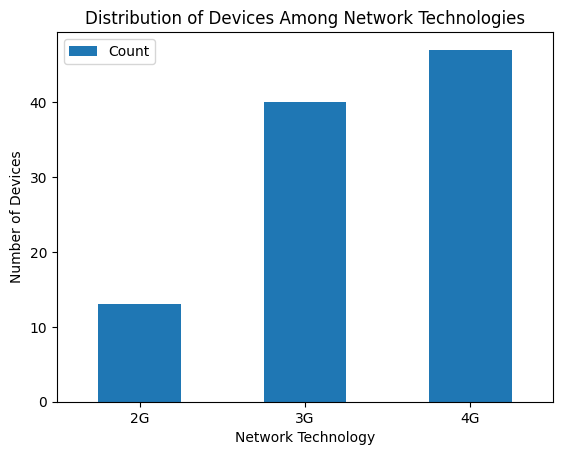

In [5]:
#plot barplot
counts = df_devices['Network_Technology'].value_counts()

df_counts = counts.to_frame(name='Count').rename_axis('Network_Technology').reset_index()

df_counts_sorted = df_counts.sort_values('Network_Technology')

fig, ax = plt.subplots()
df_counts_sorted.plot(kind='bar', ax=ax, color=['#1f77b4', '#ff7f0e', '#2ca02c'])
ax.set_xlabel('Network Technology')
ax.set_ylabel('Number of Devices')
ax.set_title('Distribution of Devices Among Network Technologies')
ax.set_xticklabels(df_counts_sorted['Network_Technology'], rotation=0)

plt.show()


2- correlation matrix among columns for dimensions, size, weight, pixel, screen-to-body ratio, battery capacity, and PPI (pixels per inch)

In [7]:
# hypothetical data
np.random.seed(42)

data = {
    'Dimensions': np.random.normal(150, 10, 100),  
    'Size': np.random.normal(6, 0.5, 100),         
    'Weight': np.random.normal(200, 50, 100),      
    'Pixel': np.random.normal(12, 4, 100),         
    'ScreenToBodyRatio': np.random.normal(80, 5, 100), 
    'BatteryCapacity': np.random.normal(3500, 500, 100), 
    'PPI': np.random.normal(300, 50, 100)          
}

df = pd.DataFrame(data)

df.head() 

,Dimensions,Size,Weight,Pixel,ScreenToBodyRatio,BatteryCapacity,PPI
0,154.967142,5.292315,217.889368,8.684020,72.027862,3963.088774,337.849431
1,148.617357,5.789677,228.039226,9.759276,77.003125,4454.708320,253.891734
2,156.476885,5.828643,254.152562,14.989174,80.026218,2800.716213,343.480296
3,165.230299,5.598861,252.690103,14.441481,80.234903,3781.484618,367.781893
4,147.658466,5.919357,131.116532,11.916394,77.749673,3174.678715,320.671745


In [10]:
columns_of_interest = ['Dimensions', 'Size', 'Weight', 'Pixel', 'ScreenToBodyRatio', 'BatteryCapacity', 'PPI']
correlation_matrix = df[columns_of_interest].corr()
correlation_matrix

,Dimensions,Size,Weight,Pixel,ScreenToBodyRatio,BatteryCapacity,PPI
Dimensions,1.000000,-0.136422,0.190840,-0.170227,-0.136187,-0.152475,0.038896
Size,-0.136422,1.000000,-0.036632,-0.017613,0.190774,-0.129776,0.083983
Weight,0.190840,-0.036632,1.000000,-0.000259,-0.106081,-0.152033,-0.113428
Pixel,-0.170227,-0.017613,-0.000259,1.000000,0.214253,0.072585,0.040529
ScreenToBodyRatio,-0.136187,0.190774,-0.106081,0.214253,1.000000,-0.089039,0.114374
BatteryCapacity,-0.152475,-0.129776,-0.152033,0.072585,-0.089039,1.000000,-0.083433
PPI,0.038896,0.083983,-0.113428,0.040529,0.114374,-0.083433,1.000000


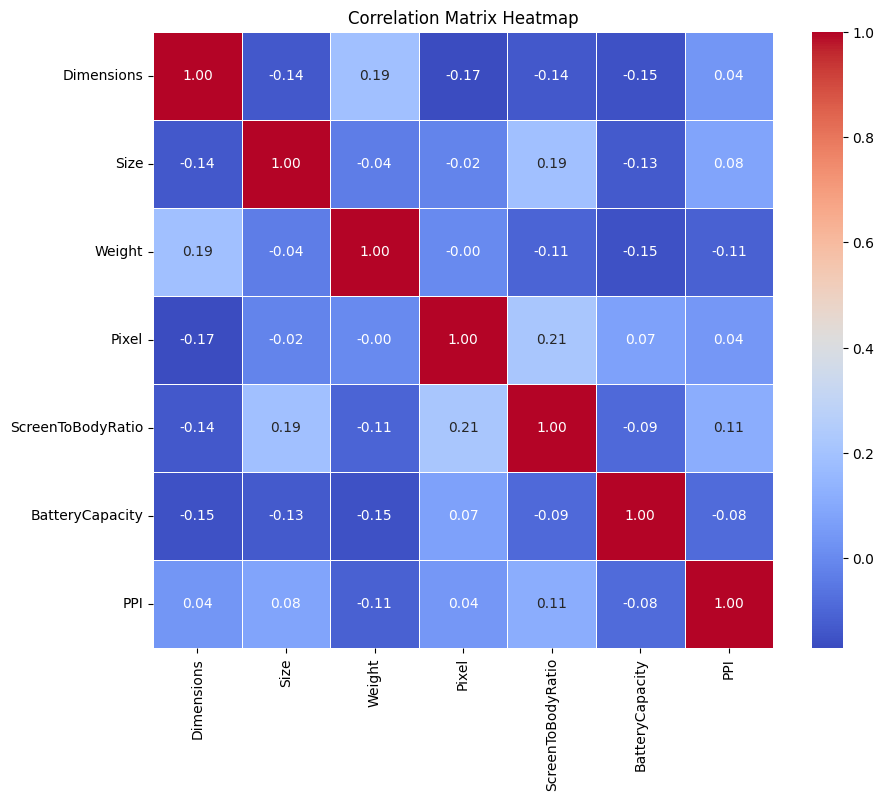

In [13]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

3- visualize the most common type of SIM card used in mobile devices

In [22]:
#hypothetical data
np.random.seed(42)

sim_types = ['Nano SIM', 'Micro SIM', 'Mini SIM', 'eSIM']
sim_data = np.random.choice(sim_types, 200, p=[0.5, 0.3, 0.15, 0.05])  

df_sim = pd.DataFrame(sim_data, columns=['SIM Type'])

df_sim

,SIM Type
0,Nano SIM
1,eSIM
2,Micro SIM
3,Micro SIM
4,Nano SIM
...,...
195,Nano SIM
196,Micro SIM
197,Mini SIM
198,Mini SIM


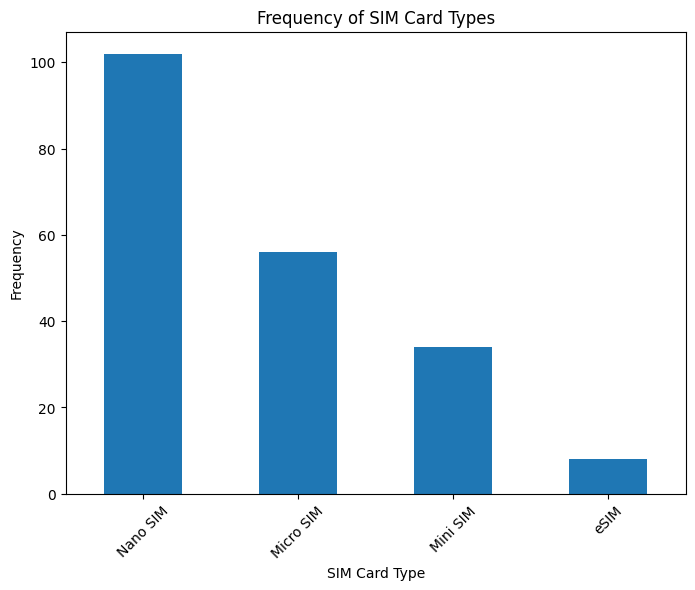

In [23]:
# frequency of each type
sim_counts = df_sim['SIM Type'].value_counts()

plt.figure(figsize=(8, 6))
sim_counts.plot(kind='bar')
plt.title('Frequency of SIM Card Types')
plt.xlabel('SIM Card Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


4- visualize the top ten most used Android versions in mobile devices

In [25]:
#data generation
np.random.seed(42)

android_versions = ['Android 10', 'Android 11', 'Android 9', 'Android 8', 'Android 8.1',
                    'Android 7', 'Android 7.1', 'Android 6', 'Android 5', 'Android 5.1',
                    'Android 4.4', 'Android 4.3', 'Android 4.2', 'Android 4.1', 'Android 4.0']
version_data = np.random.choice(android_versions, 500, p=[0.10, 0.10, 0.10, 0.09, 0.09,
                                                           0.08, 0.08, 0.07, 0.06, 0.06,
                                                           0.05, 0.04, 0.03, 0.03, 0.02]) 

df_android = pd.DataFrame(version_data, columns=['Android Version'])

df_android

,Android Version
0,Android 8
1,Android 4.1
2,Android 5
3,Android 7.1
4,Android 11
...,...
495,Android 8
496,Android 7.1
497,Android 10
498,Android 4.1


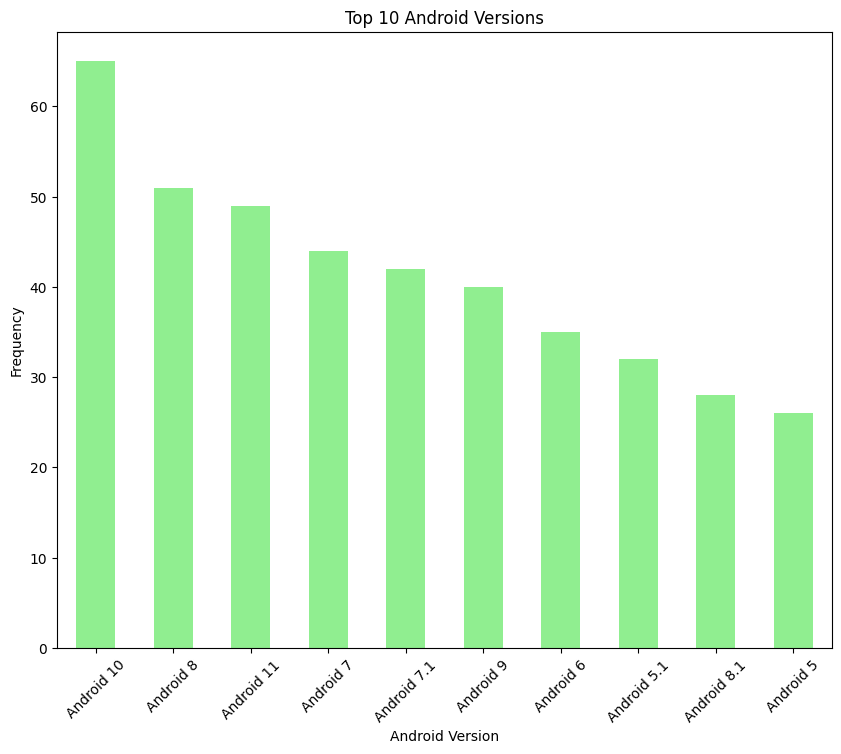

In [26]:
version_counts = df_android['Android Version'].value_counts()

top_10_versions = version_counts.head(10)

plt.figure(figsize=(10, 8))
top_10_versions.plot(kind='bar', color='lightgreen')
plt.title('Top 10 Android Versions')
plt.xlabel('Android Version')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

5- top 50 most expensive phones and analyze their distribution by operating system (NB this question requires interpretation by real data)

In [27]:
# hypothetical data
df = pd.DataFrame({
    'Price': np.random.randint(200, 2000, 500),  
    'OS': np.random.choice(['Android', 'iOS', 'Others'], 500, p=[0.7, 0.2, 0.1])  
})
df.head()

,Price,OS
0,701,Others
1,1158,Android
2,1368,Android
3,1424,Android
4,1128,Android


OS
Android    29
iOS        11
Others     10
Name: count, dtype: int64


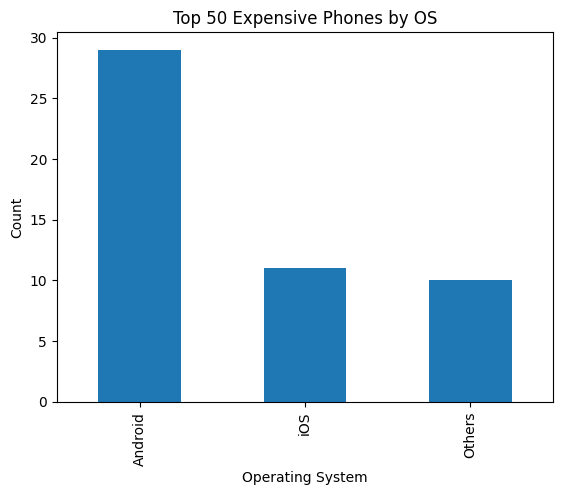

In [35]:

top_50_phones = df.nlargest(50, 'Price')

os_counts = top_50_phones['OS'].value_counts()
print(os_counts)

# relationship between price and OS
os_counts.plot(kind='bar', title='Top 50 Expensive Phones by OS')
plt.xlabel('Operating System')
plt.ylabel('Count')
plt.show()
# groups = df.groupby('OS')
# fig, ax = plt.subplots()
# for name, group in groups:
#     ax.plot(group.OS, group.Price, marker='o', linestyle='', label=name)

# ax.legend()
# plt.xlabel('OS')
# plt.ylabel('Price')
# plt.title('Scatter Plot of Phone Prices by OS')
# plt.show()

6- plot the distribution of phones by brand

In [38]:
#hypo data
brands = ['Alcatel', 'Apple', 'Asus', 'BLU', 'HTC', 'Huawei', 'Infinix', 'Lenovo', 'LG', 'Nokia', 'Sony', 'Xiaomi', 'ZTE', 'Samsung']
n_phones = 100 
brand_distribution = np.random.choice(brands, n_phones)
df = pd.DataFrame({'Brand': brand_distribution})
df

,Brand
0,HTC
1,BLU
2,Xiaomi
3,Xiaomi
4,Samsung
...,...
95,Sony
96,Xiaomi
97,Alcatel
98,LG


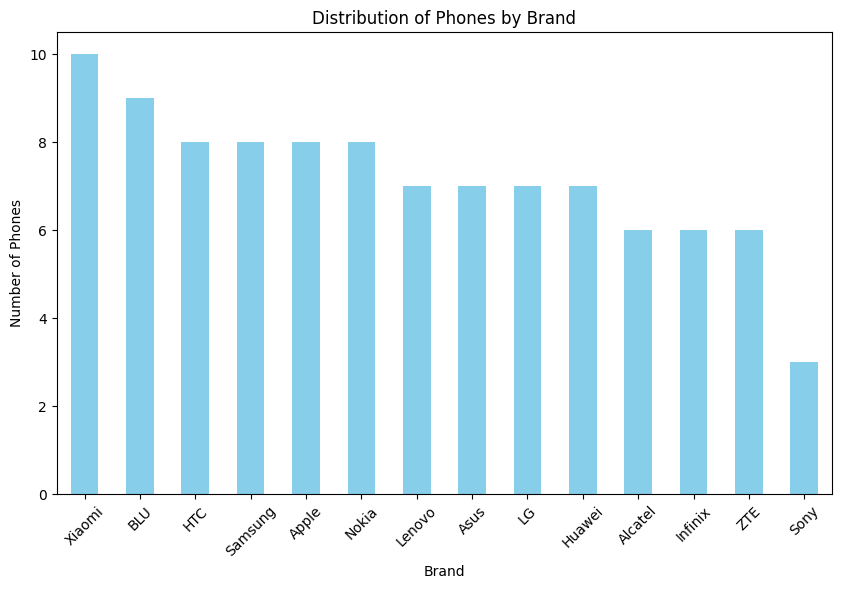

In [39]:
brand_counts = df['Brand'].value_counts()

brand_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.xlabel('Brand')
plt.ylabel('Number of Phones')
plt.title('Distribution of Phones by Brand')
plt.xticks(rotation=45)
plt.show()

7- scatter plot of PPI density based on the year for Samsung, Apple, and Xiaomi ( requires real data)

In [40]:
# data gen
n = 300  
brands = ['Samsung', 'Apple', 'Xiaomi'] + ['Other'] * 7
years = np.random.choice(range(2010, 2023), n)
ppi_density = np.random.uniform(200, 600, n) 
brand_distribution = np.random.choice(brands, n)

df = pd.DataFrame({
    'Brand': brand_distribution,
    'Year': years,
    'PPI': ppi_density
})
df

,Brand,Year,PPI
0,Other,2013,223.381846
1,Other,2021,256.709757
2,Other,2018,309.816102
3,Other,2020,438.818767
4,Other,2014,470.336498
...,...,...,...
295,Other,2020,444.776202
296,Other,2019,242.372285
297,Other,2018,260.627749
298,Apple,2022,237.502768


In [41]:
filtered_df = df[df['Brand'].isin(['Samsung', 'Apple', 'Xiaomi'])]
filtered_df

,Brand,Year,PPI
6,Samsung,2021,378.316366
8,Xiaomi,2010,206.328437
9,Samsung,2010,336.436010
12,Xiaomi,2017,334.890853
14,Apple,2015,509.049091
...,...,...,...
278,Apple,2010,272.237839
279,Xiaomi,2016,221.543283
281,Xiaomi,2014,501.274934
294,Apple,2016,497.369514


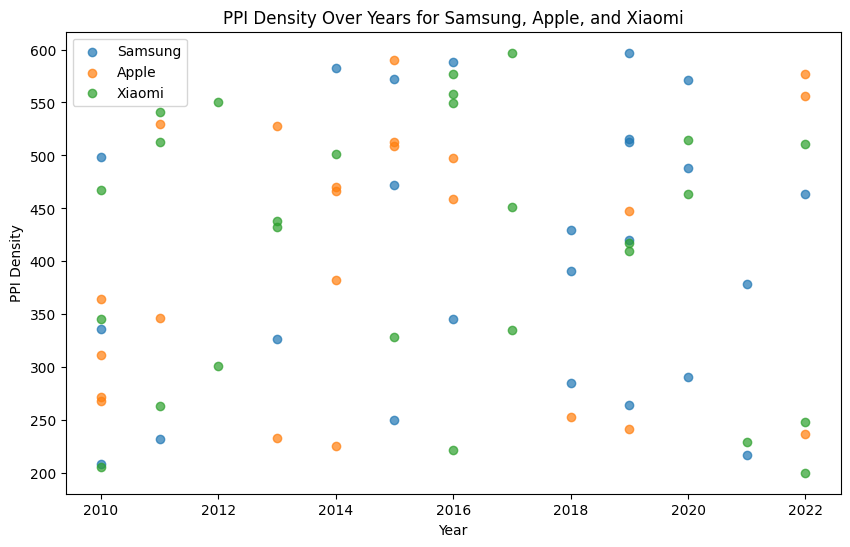

In [42]:
plt.figure(figsize=(10, 6))
for brand in ['Samsung', 'Apple', 'Xiaomi']:
    subset = filtered_df[filtered_df['Brand'] == brand]
    plt.scatter(subset['Year'], subset['PPI'], label=brand, alpha=0.7)

plt.xlabel('Year')
plt.ylabel('PPI Density')
plt.title('PPI Density Over Years for Samsung, Apple, and Xiaomi')
plt.legend()
plt.show()

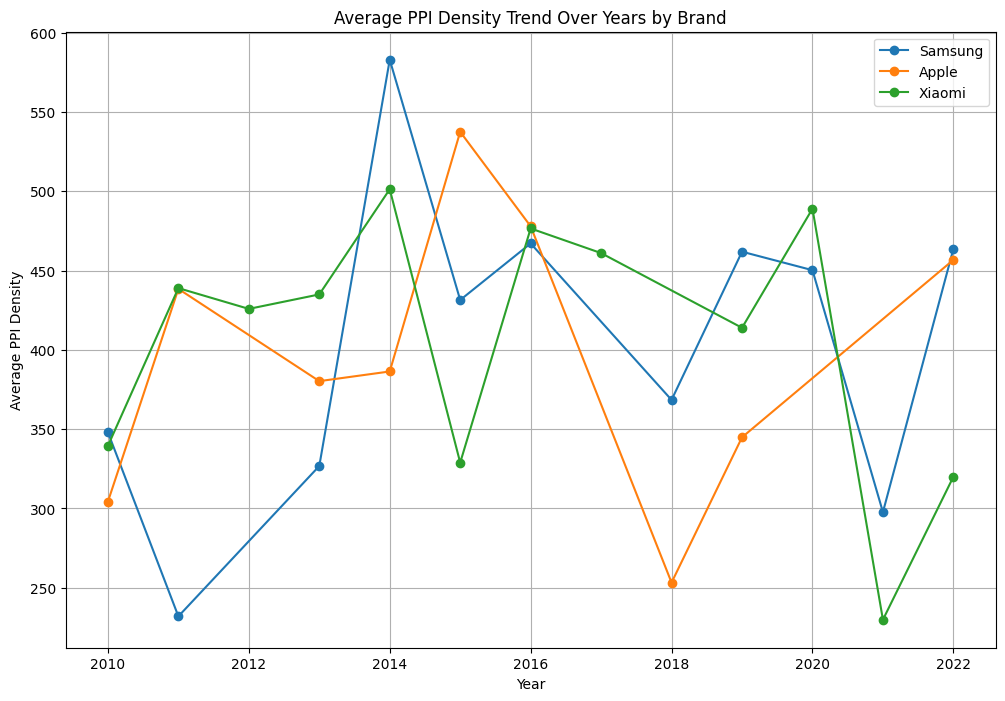

In [44]:
plt.figure(figsize=(12, 8))

for brand in ['Samsung', 'Apple', 'Xiaomi']:
    brand_df = df[df['Brand'] == brand].groupby('Year')['PPI'].mean().reset_index()
    plt.plot(brand_df['Year'], brand_df['PPI'], marker='o', linestyle='-', label=brand)

plt.xlabel('Year')
plt.ylabel('Average PPI Density')
plt.title('Average PPI Density Trend Over Years by Brand')
plt.legend()
plt.grid(True)
plt.show()

8- distribution of quantitative features (need the real data)